Geoffrey Crowther
Colab Link:https://colab.research.google.com/drive/1XraeG8ZHVaLeKdtDK4ytfap3qDB2hO8v?usp=sharing

#Data Cleaning Section; Midterm project

In [2497]:
import pandas as pd
!pip install my_package openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2498]:
UN1=pd.read_excel("https://github.com/shionguha/inf1340-programmingfordatascience-fa22/blob/main/project%20data/UN_MigrantStockTotal_2015.xlsx?raw=true",sheet_name=1)
UN2=pd.read_excel("https://github.com/shionguha/inf1340-programmingfordatascience-fa22/blob/main/project%20data/UN_MigrantStockTotal_2015.xlsx?raw=true",sheet_name=2)
UN3=pd.read_excel("https://github.com/shionguha/inf1340-programmingfordatascience-fa22/blob/main/project%20data/UN_MigrantStockTotal_2015.xlsx?raw=true",sheet_name=3)
UN4=pd.read_excel("https://github.com/shionguha/inf1340-programmingfordatascience-fa22/blob/main/project%20data/UN_MigrantStockTotal_2015.xlsx?raw=true",sheet_name=4)
UN5=pd.read_excel("https://github.com/shionguha/inf1340-programmingfordatascience-fa22/blob/main/project%20data/UN_MigrantStockTotal_2015.xlsx?raw=true",sheet_name=5)
UN6=pd.read_excel("https://github.com/shionguha/inf1340-programmingfordatascience-fa22/blob/main/project%20data/UN_MigrantStockTotal_2015.xlsx?raw=true",sheet_name=6)

In [2499]:
#first drop the first 15 rows because they are a graphical header and not useful; then refactor index
UN1.drop(UN1.index[0:15],inplace=True)

In [2500]:
UN1.reset_index(inplace=True,drop=True)

In [2501]:
#next we change the column names, though these aren't final, placeholders to allow easier manupulation
UN1.columns=['Sort Order','Country/Region/Major Region','Classification Notes','Country Code','Type of Data','1990b','1995b','2000b','2005b','2010b','2015b','1990M','1995M','2000M','2005M','2010M','2015M','1990F','1995F','2000F','2005F','2010F','2015F'
            ]

In [2502]:
#now we have our temp. column names we can drop the sort order as finding values in the dataset can be done through functions and human readability isn't necessary for tidydata
UN1.drop(columns=['Sort Order'],inplace=True)

In [2503]:
#we make seperate columns for each type of data value as they are unique measurements
result= []
for value in UN1["Type of Data"]:
  if value == 'B'or value == 'C B' or value == 'B R' or value == 'B I' or value == 'C B R':
    result.append("1")
  else:
    result.append("0")
UN1["B Type of Data"]=result

In [2504]:
result2= []
for value in UN1["Type of Data"]:
  if value == 'C'or value == 'C B' or value == 'C R' or value == 'C I' or value == 'C B R':
    result2.append("1")
  else:
    result2.append("0")
UN1["C Type of Data"]=result2

In [2505]:
result3= []
for value in UN1["Type of Data"]:
  if value == 'I'or value == 'C I' or value == 'I R' or value == 'B I':
    result3.append("1")
  else:
    result3.append("0")
UN1["I Type of Data"]=result3

In [2506]:
result4= []
for value in UN1["Type of Data"]:
  if value == 'R'or value == 'C R' or value == 'B R' or value == 'I R' or value == 'C B R':
    result4.append("1")
  else:
    result4.append("0")
UN1["R Type of Data"]=result4

In [2507]:
#next we pivot values into appropriate columns
UN1=UN1.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code","Type of Data","B Type of Data","C Type of Data","I Type of Data","R Type of Data"],
              var_name=["Year_Sex"],
              value_name="Migrantpop",
        )

In [2508]:
#now we seperate the Sex string into its own column away from the years for our newly pivoted columns
UN1=(UN1.assign(Sexes = lambda x: x.Year_Sex.str[4].astype(str), Year = lambda x: x.Year_Sex.str[0:4].astype(str)).drop("Year_Sex",axis=1))

In [2509]:
#now we change the name of the "Country/Region/Major Region" to "Geographic Area" because it more accurately reflects the information in the column
#while we could seperate out the region and major regions from the countries ulimately they are all geographic areas having a unique attribute about them measured so could be creating artificial features
UN1=UN1.rename(columns={'Country/Region/Major Region':'Geographic Area','Year':'Year of Measure','Migrantpop':'Migrant Population','Sexes':'Sex'})

In [2510]:
#change 'b' in the gender column to 'Both' for clarity reasons, make it distinct from Type of Data column
UN1=UN1.replace('b','Both')
UN1.drop(columns=['Type of Data'],inplace=True)
UN1.sample(10)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,I Type of Data,R Type of Data,Migrant Population,Sex,Year of Measure
2048,Grenada,NaN,308,1,0,0,0,2746,M,1995
2063,Belize,NaN,84,0,0,0,0,17512,M,1995
645,Jordan,NaN,400,0,1,0,1,1927845,Both,2000
232,Bermuda,NaN,60,1,0,0,0,15683,Both,1990
3605,Italy,NaN,380,1,0,0,0,965401,F,1995
143,Finland,(15),246,1,0,0,0,63255,Both,1990
879,Republic of Korea,NaN,410,0,1,0,0,485546,Both,2005
4752,Micronesia,NaN,954,0,0,0,0,57159.0,F,2015
3624,Latin America and the Caribbean,NaN,904,0,0,0,0,3344871,F,1995
223,Falkland Islands (Malvinas),NaN,238,1,0,0,0,855,Both,1990


In [2511]:
#Overall Plan after sheet 1
#same changes can be applied to table 2 because they're in a similar format, it is instead just measuring total population of an area rather than migrant pop.
#table 3 same deal, measures migrants as a % of total population of area but same format as table 1
#table 4 same format, which % of migrants are females in each area
#table 5 measures change in % of migrants in each area over time and sex
#table 6 is where things change 3 different types of measure so it should be broken down into 3 further tables;
#split table 6 into: one table for Estimated refugee pop., 1 table for refugees as a % of migrant stock, 1 for annual rate of change of refugee stock

In [2512]:
#TABLE 2:

In [2513]:
#we can repeat the actions taken on table 2 as it is in the same format as table 1
UN2.drop(UN2.index[0:15],inplace=True)

In [2514]:
UN2.reset_index(inplace=True,drop=True)

In [2515]:
#next we change the column names, though there is no Type of Data column here unlike in table 1 as these are not estimates
UN2.columns=['Sort Order','Country/Region/Major Region','Classification Notes','Country Code','1990b','1995b','2000b','2005b','2010b','2015b','1990M','1995M','2000M','2005M','2010M','2015M','1990F','1995F','2000F','2005F','2010F','2015F'
            ]

In [2516]:
UN2.drop(columns=['Sort Order'],inplace=True)

In [2517]:
UN2=UN2.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code"],
              var_name=["Year_Sex"],
              value_name="Totalpop",
        )

In [2518]:
UN2=(UN2.assign(Sexes = lambda x: x.Year_Sex.str[4].astype(str), Year = lambda x: x.Year_Sex.str[0:4].astype(str)).drop("Year_Sex",axis=1))

In [2519]:
UN2=UN2.rename(columns={'Country/Region/Major Region':'Geographic Area','Year':'Year of Measure','Totalpop':'Total Population','Sexes':'Sex'})

In [2520]:
UN2=UN2.replace('b','Both')
UN2.sample(10)

,Geographic Area,Classification Notes,Country Code,Total Population,Sex,Year of Measure
3961,Micronesia (Federated States of),NaN,583,53.046,F,2000
1275,Panama,NaN,591,3620.506,Both,2010
1011,South America,NaN,931,374809.128,Both,2005
4241,Developed regions,(b),901,633420.235,F,2010
4047,Kazakhstan,NaN,398,8030.82,F,2005
1437,Georgia,(11),268,3999.812,Both,2015
3842,Poland,NaN,616,19805.251,F,2000
2090,Saint Pierre and Miquelon,NaN,666,..,M,1995
4195,Chile,NaN,152,8157.049,F,2005
87,Cambodia,NaN,116,9008.856,Both,1990


In [2521]:
#TABLE 3

In [2522]:
#same plan as table 1
UN3.drop(UN3.index[0:15],inplace=True)

In [2523]:
UN3.reset_index(inplace=True,drop=True)

In [2524]:
#Here unlike table 2 we have a Type of Data column becuase these are measuring by estimate
UN3.columns=['Sort Order','Country/Region/Major Region','Classification Notes','Country Code','Type of Data','1990b','1995b','2000b','2005b','2010b','2015b','1990M','1995M','2000M','2005M','2010M','2015M','1990F','1995F','2000F','2005F','2010F','2015F'
            ]

In [2525]:
UN3.drop(columns=['Sort Order'],inplace=True)

In [2526]:
result= []
for value in UN3["Type of Data"]:
  if value == 'B'or value == 'C B' or value == 'B R' or value == 'B I' or value == 'C B R':
    result.append("1")
  else:
    result.append("0")
UN3["B Type of Data"]=result

In [2527]:
result2= []
for value in UN3["Type of Data"]:
  if value == 'C'or value == 'C B' or value == 'C R' or value == 'C I' or value == 'C B R':
    result2.append("1")
  else:
    result2.append("0")
UN3["C Type of Data"]=result2

In [2528]:
result3= []
for value in UN3["Type of Data"]:
  if value == 'I'or value == 'C I' or value == 'I R' or value == 'B I':
    result3.append("1")
  else:
    result3.append("0")
UN3["I Type of Data"]=result3

In [2529]:
result4= []
for value in UN3["Type of Data"]:
  if value == 'R'or value == 'C R' or value == 'B R' or value == 'I R' or value == 'C B R':
    result4.append("1")
  else:
    result4.append("0")
UN3["R Type of Data"]=result4

In [2530]:
UN3=UN3.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code","Type of Data","B Type of Data","C Type of Data","R Type of Data","I Type of Data"],
              var_name=["Year_Sex"],
              value_name="Percentage of Migrants of Total Population",
        )

In [2531]:
UN3=(UN3.assign(Sexes = lambda x: x.Year_Sex.str[4].astype(str), Year = lambda x: x.Year_Sex.str[0:4].astype(str)).drop("Year_Sex",axis=1))

In [2532]:
UN3=UN3.rename(columns={'Country/Region/Major Region':'Geographic Area','Year':'Year of Measure','Sexes':'Sex'})

In [2533]:
#change 'b' in the gender column to 'Both' for clarity reasons, make it distinct from Type of Data column
UN3=UN3.replace('b','Both')
UN3.drop(columns=['Type of Data'],inplace=True)
UN3.sample(10)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Percentage of Migrants of Total Population,Sex,Year of Measure
647,Lebanon,NaN,422,1,0,1,0,21.416742,Both,2000
1309,Kiribati,NaN,296,1,0,0,0,2.794014,Both,2010
4377,Ukraine,NaN,804,1,0,0,0,11.185216,F,2010
2228,Armenia,NaN,51,1,0,1,0,18.690574,M,2000
743,Mexico,NaN,484,1,0,1,0,0.523352,Both,2000
2250,Czech Republic,NaN,203,0,1,0,0,2.388468,M,2000
1122,Mali,NaN,466,1,0,1,0,2.219296,Both,2010
3091,Monaco,NaN,492,1,0,0,0,..,M,2015
555,United Republic of Tanzania,(2),834,1,0,1,0,2.730617,Both,2000
2360,New Zealand,NaN,554,1,0,0,0,17.42532,M,2000


In [2534]:
#TABLE 4

In [2535]:
#For table 4
UN4.drop(UN4.index[0:15],inplace=True)

In [2536]:
UN4.reset_index(inplace=True,drop=True)

In [2537]:
UN4.columns=['Sort Order','Country/Region/Major Region','Classification Notes','Country Code','Type of Data','1990','1995','2000','2005','2010','2015'
            ]

In [2538]:
UN4.drop(columns=['Sort Order'],inplace=True)

In [2539]:
result= []
for value in UN4["Type of Data"]:
  if value == 'B'or value == 'C B' or value == 'B R' or value == 'B I' or value == 'C B R':
    result.append("1")
  else:
    result.append("0")
UN4["B Type of Data"]=result

In [2540]:
result2= []
for value in UN4["Type of Data"]:
  if value == 'C'or value == 'C B' or value == 'C R' or value == 'C I' or value == 'C B R':
    result2.append("1")
  else:
    result2.append("0")
UN4["C Type of Data"]=result2

In [2541]:
result3= []
for value in UN4["Type of Data"]:
  if value == 'I'or value == 'C I' or value == 'I R' or value == 'B I':
    result3.append("1")
  else:
    result3.append("0")
UN4["I Type of Data"]=result3

In [2542]:
result4= []
for value in UN4["Type of Data"]:
  if value == 'R'or value == 'C R' or value == 'B R' or value == 'I R' or value == 'C B R':
    result4.append("1")
  else:
    result4.append("0")
UN4["R Type of Data"]=result4

In [2543]:
#while the arrangement of the columns and their names are similar to the other sheets since this is only measuring a % single Sex we won't need a sex column
UN4=UN4.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code","Type of Data","B Type of Data","C Type of Data","R Type of Data","I Type of Data"],
              var_name=["Year"],
              value_name="Percentage of Female Migrants of Total Migrants",
        )

In [2544]:
#now we change the name of the "Country/Region/Major Region" to "Geographic Area" because it more accurately reflects the information in the column
#while we could seperate out the region and major regions from the countries ulimately they are all geographic areas having a unique attribute about them measured so could be creating artificial features
UN4=UN4.rename(columns={'Country/Region/Major Region':'Geographic Area'})
UN4.drop(columns=['Type of Data'],inplace=True)
UN4.sample(10)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Year,Percentage of Female Migrants of Total Migrants
1399,Tajikistan,NaN,762,1,0,0,0,2015,56.883069
1541,South America,NaN,931,0,0,0,0,2015,50.895754
521,American Samoa,NaN,16,1,0,0,0,1995,47.887263
1491,Slovenia,NaN,705,1,0,0,0,2015,43.004077
211,Guatemala,NaN,320,1,0,1,0,1990,57.384289
1206,Isle of Man,NaN,833,1,0,0,0,2010,50.83435
104,Nepal,NaN,524,1,0,1,0,1990,70.70381
750,Chile,NaN,152,1,0,0,0,2000,52.226896
344,"China, Hong Kong Special Administrative Region",(6),344,1,0,0,0,1995,51.915543
1567,Fiji,NaN,242,1,0,0,0,2015,46.033016


In [2545]:
#TABLE 5

In [2546]:
#as with the other tables we can repeat code on Table 5
UN5.drop(UN5.index[0:15],inplace=True)

In [2547]:
UN5.reset_index(inplace=True,drop=True)

In [2548]:
UN5.columns=['Sort Order','Country/Region/Major Region','Classification Notes','Country Code','Type of Data','1990-1995b','1995-2000b','2000-2005b','2005-2010b','2010-2015b','1990-1995M','1995-2000M','2000-2005M','2005-2010M','2010-2015M','1990-1995F','1995-2000F','2000-2005F','2005-2010F','2010-2015F'
            ]

In [2549]:
UN5.drop(columns=['Sort Order'],inplace=True)

In [2550]:
result= []
for value in UN5["Type of Data"]:
  if value == 'B'or value == 'C B' or value == 'B R' or value == 'B I' or value == 'C B R':
    result.append("1")
  else:
    result.append("0")
UN5["B Type of Data"]=result

In [2551]:
result2= []
for value in UN5["Type of Data"]:
  if value == 'C'or value == 'C B' or value == 'C R' or value == 'C I' or value == 'C B R':
    result2.append("1")
  else:
    result2.append("0")
UN5["C Type of Data"]=result2

In [2552]:
result3= []
for value in UN5["Type of Data"]:
  if value == 'I'or value == 'C I' or value == 'I R' or value == 'B I':
    result3.append("1")
  else:
    result3.append("0")
UN5["I Type of Data"]=result3

In [2553]:
result4= []
for value in UN5["Type of Data"]:
  if value == 'R'or value == 'C R' or value == 'B R' or value == 'I R' or value == 'C B R':
    result4.append("1")
  else:
    result4.append("0")
UN5["R Type of Data"]=result4

In [2554]:
UN5=UN5.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code","Type of Data","B Type of Data","C Type of Data","R Type of Data","I Type of Data"],
              var_name=["Years_Sex"],
              value_name="Percentage of Change of Total Migrant Stock",
        )

In [2555]:
UN5=(UN5.assign(Sexes = lambda x: x.Years_Sex.str[9].astype(str), Years = lambda x: x.Years_Sex.str[0:9].astype(str)).drop("Years_Sex",axis=1))

In [2556]:
UN5=UN5.rename(columns={'Country/Region/Major Region':'Geographic Area','Years':'Years of Measure','Sexes':'Sex'})

In [2557]:
UN5=UN5.replace('b','Both')
UN5.drop(columns=['Type of Data'],inplace=True)
UN5.sample(10)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Percentage of Change of Total Migrant Stock,Sex,Years of Measure
3018,Maldives,NaN,462,0,1,1,0,5.47492,F,1995-2000
2036,Anguilla,NaN,660,1,0,0,0,2.917785,M,2000-2005
3259,"China, Hong Kong Special Administrative Region",(6),344,1,0,0,0,1.2438,F,2000-2005
869,Tajikistan,NaN,762,1,0,0,0,-0.164127,Both,2005-2010
1033,Australia and New Zealand,NaN,927,0,0,0,0,3.555413,Both,2005-2010
2553,The former Yugoslav Republic of Macedonia,NaN,807,1,0,0,0,0.158066,M,2010-2015
206,United States Virgin Islands,NaN,850,1,0,0,0,0.855409,Both,1990-1995
1179,Qatar,NaN,634,0,1,0,0,2.947091,Both,2010-2015
3944,Greenland,NaN,304,1,0,0,0,0.412386,F,2010-2015
3477,Chad,NaN,148,1,0,1,0,3.588692,F,2005-2010


In [2558]:
#TABLE 6

In [2559]:
#we can do the same things for Table 6 at the start however the contents of the table must be split up into 3 distinct tables
UN6.drop(UN6.index[0:15],inplace=True)

In [2560]:
UN6.reset_index(inplace=True,drop=True)

In [2561]:
UN6.columns=['Sort Order','Country/Region/Major Region','Classification Notes','Country Code','Type of Data','1990x','1995x','2000x','2005x','2010x','2015x','1990y','1995y','2000y','2005y','2010y','2015y','1990-1995z','1995-2000z','2000-2005z','2005-2010z','2010-2015z'
            ]

In [2562]:
result= []
for value in UN6["Type of Data"]:
  if value == 'B'or value == 'C B' or value == 'B R' or value == 'B I' or value == 'C B R':
    result.append("1")
  else:
    result.append("0")
UN6["B Type of Data"]=result

In [2563]:
result2= []
for value in UN6["Type of Data"]:
  if value == 'C'or value == 'C B' or value == 'C R' or value == 'C I' or value == 'C B R':
    result2.append("1")
  else:
    result2.append("0")
UN6["C Type of Data"]=result2

In [2564]:
result3= []
for value in UN6["Type of Data"]:
  if value == 'I'or value == 'C I' or value == 'I R' or value == 'B I':
    result3.append("1")
  else:
    result3.append("0")
UN6["I Type of Data"]=result3

In [2565]:
result4= []
for value in UN6["Type of Data"]:
  if value == 'R'or value == 'C R' or value == 'B R' or value == 'I R' or value == 'C B R':
    result4.append("1")
  else:
    result4.append("0")
UN6["R Type of Data"]=result4

In [2566]:
#changes to table 6 before splitting it into 3 distinct tables
UN6.drop(columns=['Sort Order'],inplace=True)
UN6.sample(10)

,Country/Region/Major Region,Classification Notes,Country Code,Type of Data,1990x,1995x,2000x,2005x,2010x,2015x,...,2015y,1990-1995z,1995-2000z,2000-2005z,2005-2010z,2010-2015z,B Type of Data,C Type of Data,I Type of Data,R Type of Data
71,Central Asia,NaN,5500,NaN,3000,40778,96316,70790,10368.0,3499.0,...,0.064874,54.559526,19.744028,-6.368752,-38.510206,-22.217047,0,0,0,0
256,American Samoa,NaN,16,B,0,0,0,0,0.0,0.0,...,0.000000,..,..,..,..,..,1,0,0,0
64,Niger,NaN,562,B R,792,27622,58,301,314.0,61084.0,...,32.276030,66.343309,-119.7695,32.576495,0.526349,97.349493,1,0,0,1
37,Sao Tome and Principe,NaN,678,C,0,0,0,0,0.0,0.0,...,0.000000,..,..,..,..,..,0,1,0,0
18,Mozambique,NaN,508,B R,420,128,207,1954,4077.0,4445.0,...,1.993917,-30.139448,6.591641,43.986555,13.77663,0.968027,1,0,0,1
245,Solomon Islands,NaN,90,B,0,0,0,0,0.0,0.0,...,0.000000,..,..,..,..,..,1,0,0,0
134,Romania,NaN,642,B,0,194,1685,2056,1021.0,1996.0,...,0.879516,..,44.468521,1.298637,-15.437401,5.908087,1,0,0,0
11,Eritrea,NaN,232,I,0,1083,1984,4418,4809.0,2898.0,...,18.179537,..,11.236526,14.011685,-0.121815,-10.464637,0,0,1,0
49,Namibia,NaN,516,B,0,1682,27263,5307,7254.0,1519.0,...,1.617885,..,52.657317,-28.033634,6.992229,-29.533357,1,0,0,0
218,Bolivia (Plurinational State of),NaN,68,B,235,685,354,538,736.0,756.0,...,0.528712,18.892064,-15.260352,5.354192,3.644147,-2.500498,1,0,0,0


In [2567]:
#Make a table for estimated refugee stock at mid year
UN6t1=UN6.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code","Type of Data",'1990y','1995y','2000y','2005y','2010y','2015y','1990-1995z','1995-2000z','2000-2005z','2005-2010z','2010-2015z','B Type of Data','C Type of Data','R Type of Data','I Type of Data'
                        ],
              value_vars=['1990x','1995x','2000x','2005x','2010x','2015x'],
              var_name="Years_Measured",
              value_name="Estimated Refugee stock at Mid-Year",
        )

In [2568]:
#Now we drop the other values from this table as they will be going in their own tables
UN6t1.drop(columns=['1990y','1995y','2000y','2005y','2010y','2015y','1990-1995z','1995-2000z','2000-2005z','2005-2010z','2010-2015z'],inplace=True)

In [2569]:
#We can also seperate and drop the "x" from the year values as there is no need to differentiate them from other columns anymore
UN6t1=(UN6t1.assign(Sexes = lambda x: x.Years_Measured.str[4].astype(str), Year = lambda x: x.Years_Measured.str[0:4].astype(str)).drop("Years_Measured",axis=1))

In [2570]:
UN6t1.drop(columns=['Sexes','Type of Data'],inplace=True)
UN6t1=UN6t1.rename(columns={'Country/Region/Major Region':'Geographic Area','Year':'Year of Measure'})
UN6t1.sample(10)
#now we have 1 table done we do the other 2


,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Estimated Refugee stock at Mid-Year,Year of Measure
795,WORLD,NaN,900,0,0,0,0,13276733,2005
903,Armenia,NaN,51,1,0,1,0,219550,2005
1483,Greece,NaN,300,1,0,0,0,10304.0,2015
347,Japan,NaN,392,0,1,0,0,5322,1995
1285,Guyana,NaN,328,1,0,0,0,7.0,2010
531,Developed regions,(b),901,0,0,0,0,2997256,2000
294,Angola,NaN,24,1,0,1,0,11404,1995
246,Vanuatu,NaN,548,1,0,0,0,0,1990
1241,Anguilla,NaN,660,1,0,0,0,0.0,2010
376,Cyprus,(10),196,1,0,0,0,57,1995


In [2571]:
#pt. 2 of table 6

In [2572]:
UN6t2=UN6.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code","Type of Data",'1990x','1995x','2000x','2005x','2010x','2015x','1990-1995z','1995-2000z','2000-2005z','2005-2010z','2010-2015z','B Type of Data','C Type of Data','R Type of Data','I Type of Data'],
              value_vars=['1990y','1995y','2000y','2005y','2010y','2015y'],
              var_name="Years_Measured",
              value_name="Refugee stock as Percentage of Total Migrants",
        )

In [2573]:
UN6t2.drop(columns=['1990x','1995x','2000x','2005x','2010x','2015x','1990-1995z','1995-2000z','2000-2005z','2005-2010z','2010-2015z'],inplace=True)

In [2574]:
UN6t2=(UN6t2.assign(Sexes = lambda x: x.Years_Measured.str[4].astype(str), Year = lambda x: x.Years_Measured.str[0:4].astype(str)).drop("Years_Measured",axis=1))

In [2575]:
UN6t2.drop(columns=['Sexes','Type of Data'],inplace=True)
UN6t2=UN6t2.rename(columns={'Country/Region/Major Region':'Geographic Area','Year':'Year of Measure'})
UN6t2.sample(10)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Refugee stock as Percentage of Total Migrants,Year of Measure
1067,Eastern Africa,NaN,910,0,0,0,0,21.65223,2010
831,Gabon,NaN,266,0,1,0,0,3.990697,2005
589,Guinea,NaN,324,0,1,1,0,76.27657,2000
665,Russian Federation,NaN,643,1,0,0,0,0.220709,2000
1491,Slovenia,NaN,705,1,0,0,0,0.099591,2015
1292,Bermuda,NaN,60,1,0,0,0,0.0,2010
1171,Cyprus,(10),196,1,0,0,0,1.806059,2010
214,Nicaragua,NaN,558,1,0,1,0,37.674127,1990
1050,Polynesia,NaN,957,0,0,0,0,0,2005
492,Peru,NaN,604,1,0,0,0,1.075231,1995


In [2576]:
#pt.3 of table 6

In [2577]:
UN6t3=UN6.melt(id_vars=["Country/Region/Major Region","Classification Notes","Country Code","Type of Data",'1990x','1995x','2000x','2005x','2010x','2015x','1990y','1995y','2000y','2005y','2010y','2015y','B Type of Data','C Type of Data','R Type of Data','I Type of Data'],
              value_vars=['1990-1995z','1995-2000z','2000-2005z','2005-2010z','2010-2015z'],
              var_name="Years_Measured",
              value_name="Annual Rate of Change of Refugee Stock",
        )

In [2578]:
UN6t3.drop(columns=['1990x','1995x','2000x','2005x','2010x','2015x','1990y','1995y','2000y','2005y','2010y','2015y'],inplace=True)

In [2579]:
UN6t3=(UN6t3.assign(Sexes = lambda x: x.Years_Measured.str[9].astype(str), Year = lambda x: x.Years_Measured.str[0:9].astype(str)).drop("Years_Measured",axis=1))

In [2580]:
UN6t3.drop(columns=['Sexes','Type of Data'],inplace=True)
UN6t3=UN6t3.rename(columns={'Country/Region/Major Region':'Geographic Area','Year':'Years of Measure'})
UN6t3.sample(10)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Annual Rate of Change of Refugee Stock,Years of Measure
373,Armenia,NaN,51,1,0,1,0,6.029446,1995-2000
948,Albania,NaN,8,1,0,0,0,5.768321,2005-2010
760,Venezuela (Bolivarian Republic of),NaN,862,1,0,0,0,21.47704,2000-2005
458,Grenada,NaN,308,1,0,0,0,..,1995-2000
708,Switzerland,NaN,756,1,0,0,0,-6.437242,2000-2005
1171,Cyprus,(10),196,1,0,0,0,3.784869,2010-2015
317,Western Africa,NaN,914,0,0,0,0,-11.94725,1995-2000
766,United States of America,NaN,840,1,0,0,0,-8.252541,2000-2005
723,Grenada,NaN,308,1,0,0,0,..,2000-2005
649,Qatar,NaN,634,0,1,0,0,-3.818471,2000-2005


#EDA & Data Vizualizations; Final Project

In [2581]:
#EDA sort by largest population 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2582]:
#first convert variables to numeric
UN1['Migrant Population']=pd.to_numeric(UN1['Migrant Population'], errors='coerce')
#errors just ignores Nan values

In [2583]:
#a quick sort by highest migrant population down
UN1sort=UN1.sort_values('Migrant Population', ascending=False)

In [2584]:
#sort the populations by World, Developing, Developed region
UN1MJpop=UN1.loc[UN1['Country Code'].isin([900,901,902])]
UN1MJPop=UN1MJpop.loc[UN1['Sex'].isin(['Both'])]

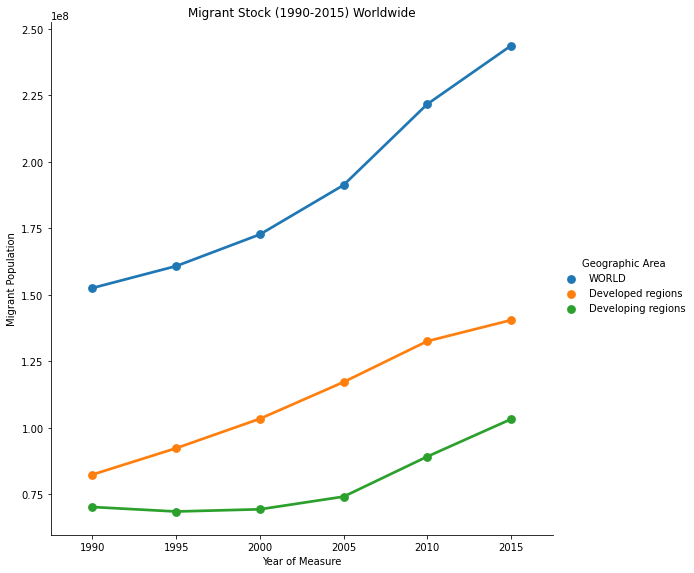

In [2585]:
#graph of the world, developed, developing subset
plot1=sns.catplot(data=UN1MJPop, kind="point", x="Year of Measure", y="Migrant Population", hue = "Geographic Area",height=8).set(title="Migrant Stock (1990-2015) Worldwide")

In [2586]:
#make a new dataframe to hold each of the major regions, Africa, Asia, Latin America and Caribbean, North America, Oceania, while signalling out only Both sex values
UN1Rpop=UN1.loc[UN1['Country Code'].isin([903,935,908,904,905,909])]
UN1RPop=UN1Rpop.loc[UN1['Sex'].isin(['Both'])]

In [2587]:
#Sort of major region migrant pop from top down
UN1sort2=UN1RPop.sort_values('Migrant Population', ascending=False)
display(UN1sort2)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,I Type of Data,R Type of Data,Migrant Population,Sex,Year of Measure
1451,Europe,NaN,908,0,0,0,0,76145954.0,Both,2015
1395,Asia,NaN,935,0,0,0,0,75081125.0,Both,2015
1186,Europe,NaN,908,0,0,0,0,72374755.0,Both,2010
1130,Asia,NaN,935,0,0,0,0,65914319.0,Both,2010
921,Europe,NaN,908,0,0,0,0,64086824.0,Both,2005
656,Europe,NaN,908,0,0,0,0,56271885.0,Both,2000
1556,Northern America,NaN,905,0,0,0,0,54488725.0,Both,2015
865,Asia,NaN,935,0,0,0,0,53371224.0,Both,2005
391,Europe,NaN,908,0,0,0,0,52842663.0,Both,1995
1291,Northern America,NaN,905,0,0,0,0,51220996.0,Both,2010


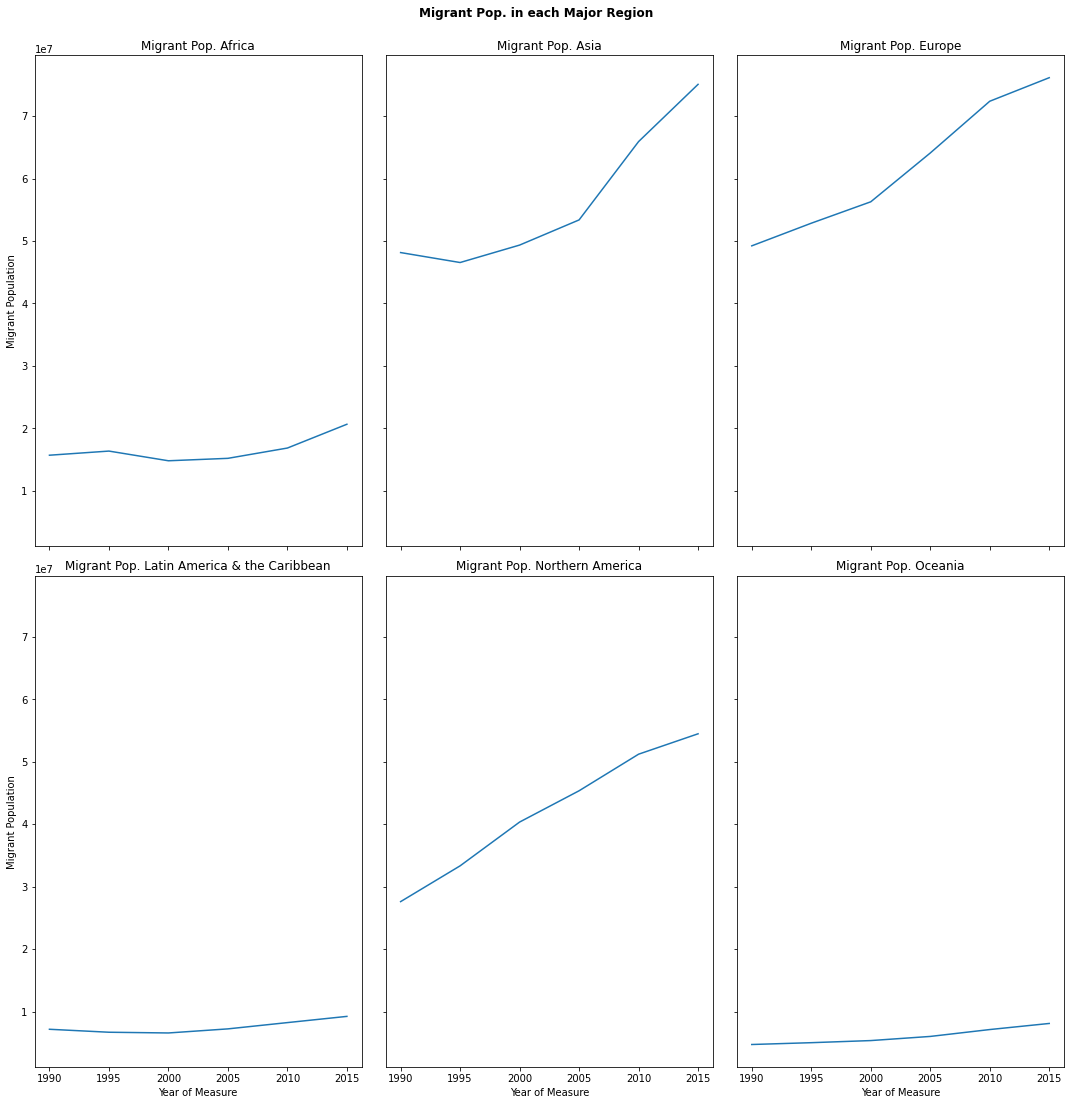

In [2588]:
#plot 2 small mutli of migrant pop in major areas
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,15))
#Africa graph
UN1RPop[UN1RPop['Geographic Area']=='Africa'].plot(x='Year of Measure', y='Migrant Population',legend=False,ax=ax1)
ax1.set_title("Migrant Pop. Africa")
ax1.set_ylabel("Migrant Population")
#Asia graph
UN1RPop[UN1RPop['Geographic Area']=='Asia'].plot(x='Year of Measure', y='Migrant Population',legend=False,ax=ax2)
ax2.set_title("Migrant Pop. Asia")
ax2.set_ylabel("Migrant Population")
#Europe graph
UN1RPop[UN1RPop['Geographic Area']=='Europe'].plot(x='Year of Measure', y='Migrant Population',legend=False,ax=ax3)
ax3.set_title("Migrant Pop. Europe")
ax3.set_ylabel("Migrant Population")
#Latin America and Caribbean graph
UN1RPop[UN1RPop['Geographic Area']=='Latin America and the Caribbean'].plot(x='Year of Measure', y='Migrant Population',legend=False,ax=ax4)
ax4.set_title("Migrant Pop. Latin America & the Caribbean")
ax4.set_ylabel("Migrant Population")
#North America graph
UN1RPop[UN1RPop['Geographic Area']=='Northern America'].plot(x='Year of Measure', y='Migrant Population',legend=False,ax=ax5)
ax5.set_title("Migrant Pop. Northern America")
ax5.set_ylabel("Migrant Population")
#Oceania graph
UN1RPop[UN1RPop['Geographic Area']=='Oceania'].plot(x='Year of Measure', y='Migrant Population',legend=False,ax=ax6)
ax6.set_title("Migrant Pop. Oceania")
ax6.set_ylabel("Migrant Population")
#Figure title

plt.suptitle('Migrant Pop. in each Major Region',fontweight='bold',fontsize=12,y=1.02)
plt.tight_layout()


In [2589]:
#Convert population numbers into numeric
UN2['Total Population']=pd.to_numeric(UN2['Total Population'], errors='coerce')


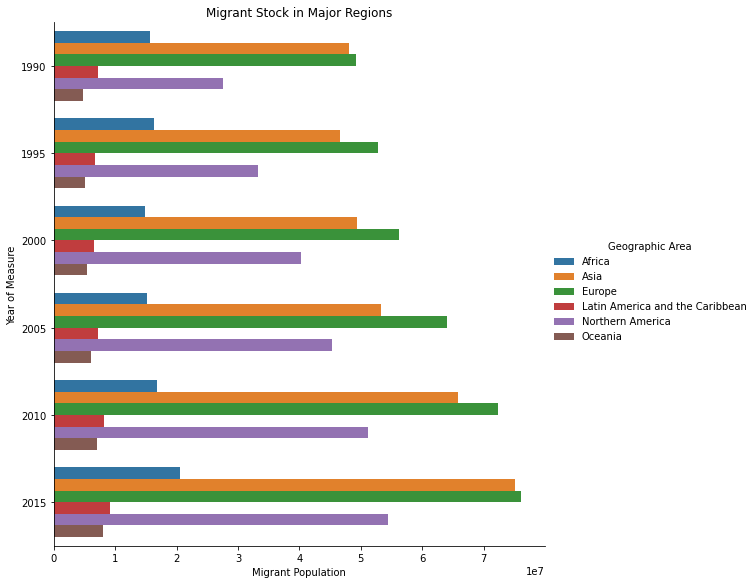

In [2590]:
#plot 3 shows count of migrant stock in major regions
plot3=sns.catplot(data=UN1RPop, kind="bar", y="Year of Measure", x="Migrant Population", hue = "Geographic Area",orient='h',height=8).set(title="Migrant Stock in Major Regions")

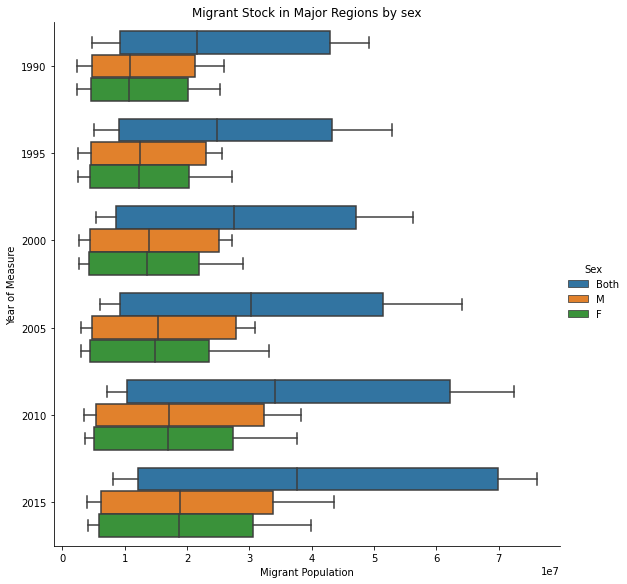

In [2592]:
#plot 4 shows count of migrant stock in major regions by sex
plot4=sns.catplot(data=UN1Rpop, kind="box", y="Year of Measure", x="Migrant Population", hue = "Sex",height=8).set(title="Migrant Stock in Major Regions by sex")

In [2591]:
#make a dataframe of same values for areas and sexes as we did for migrant population
UN2Rpop=UN2.loc[UN2['Country Code'].isin([903,935,908,904,905,909])]
UN2RPop=UN2Rpop.loc[UN2['Sex'].isin(['Both'])]

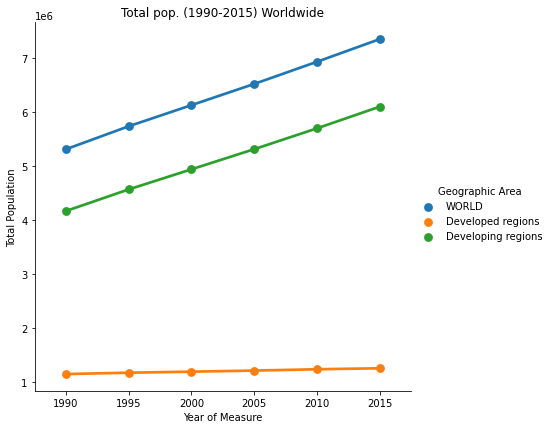

In [2593]:
#plot 5: A plot of worldwide population change
#singling out World wide, developed, developing as above
UN2MJpop=UN2.loc[UN2['Country Code'].isin([900,901,902])]

UN2MJPop=UN2MJpop.loc[UN2['Sex'].isin(['Both'])]

plot5=sns.catplot(data=UN2MJPop, kind="point", x="Year of Measure", y="Total Population", hue = "Geographic Area",height=6).set(title="Total pop. (1990-2015) Worldwide")

In [2594]:
#sort of total population in major areas down
UN2sort1=UN2RPop.sort_values('Total Population', ascending=False)

display(UN2sort1)

,Geographic Area,Classification Notes,Country Code,Total Population,Sex,Year of Measure
1395,Asia,NaN,935,4393296.014,Both,2015
1130,Asia,NaN,935,4169860.387,Both,2010
865,Asia,NaN,935,3944669.784,Both,2005
600,Asia,NaN,935,3714469.832,Both,2000
335,Asia,NaN,935,3474848.677,Both,1995
70,Asia,NaN,935,3202474.692,Both,1990
1331,Africa,NaN,903,1186178.282,Both,2015
1066,Africa,NaN,903,1044106.862,Both,2010
801,Africa,NaN,903,920238.945,Both,2005
536,Africa,NaN,903,814063.149,Both,2000


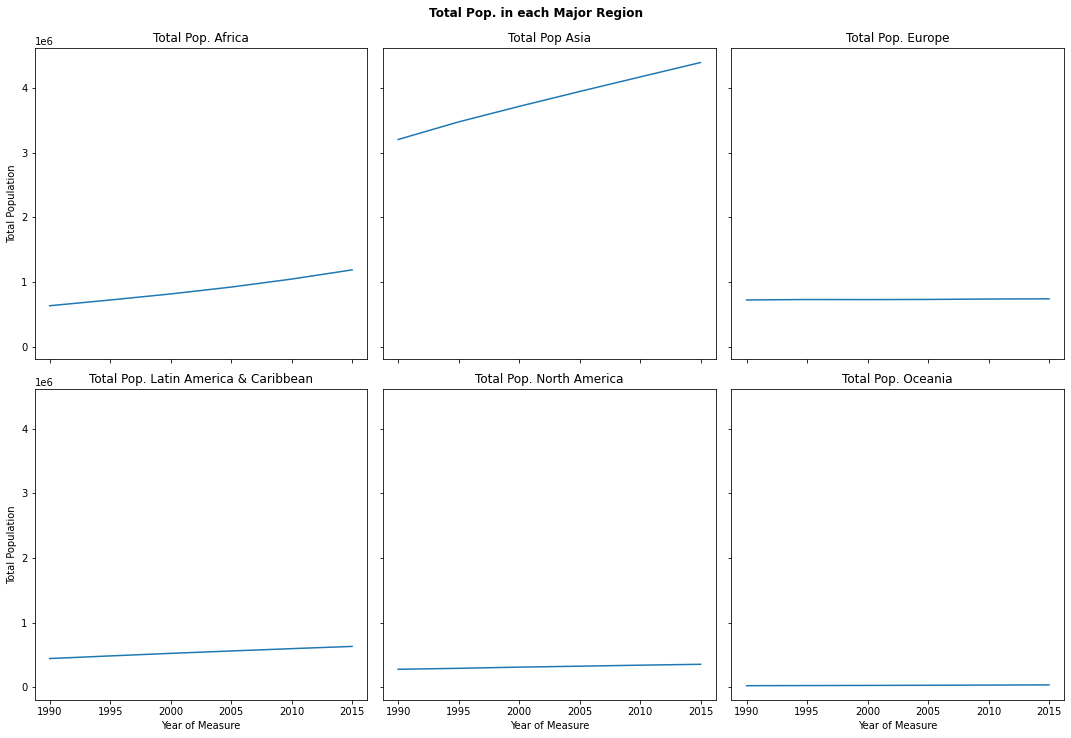

In [2595]:
#plot 6 is small mutli of change in total pop. overtime
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,10))
#Africa graph
UN2RPop[UN2RPop['Geographic Area']=='Africa'].plot(x='Year of Measure', y='Total Population',legend=False,ax=ax1)
ax1.set_title("Total Pop. Africa")
ax1.set_ylabel("Total Population")
#Asia graph
UN2RPop[UN2RPop['Geographic Area']=='Asia'].plot(x='Year of Measure', y='Total Population',legend=False,ax=ax2)
ax2.set_title("Total Pop Asia")
ax2.set_ylabel("Total Population")
#Europe graph
UN2RPop[UN2RPop['Geographic Area']=='Europe'].plot(x='Year of Measure', y='Total Population',legend=False,ax=ax3)
ax3.set_title("Total Pop. Europe")
ax3.set_ylabel("Total Population")
#Latin America and Caribbean graph
UN2RPop[UN2RPop['Geographic Area']=='Latin America and the Caribbean'].plot(x='Year of Measure', y='Total Population',legend=False,ax=ax4)
ax4.set_title("Total Pop. Latin America & Caribbean")
ax4.set_ylabel("Total Population")
#North America graph
UN2RPop[UN2RPop['Geographic Area']=='Northern America'].plot(x='Year of Measure', y='Total Population',legend=False,ax=ax5)
ax5.set_title("Total Pop. North America")
ax5.set_ylabel("Total Population")
#Oceania graph
UN2RPop[UN2RPop['Geographic Area']=='Oceania'].plot(x='Year of Measure', y='Total Population',legend=False,ax=ax6)
ax6.set_title("Total Pop. Oceania")
ax5.set_ylabel("Total Population")
#Figure title

plt.suptitle('Total Pop. in each Major Region',fontweight='bold',fontsize=12,y=1.02)
plt.tight_layout()


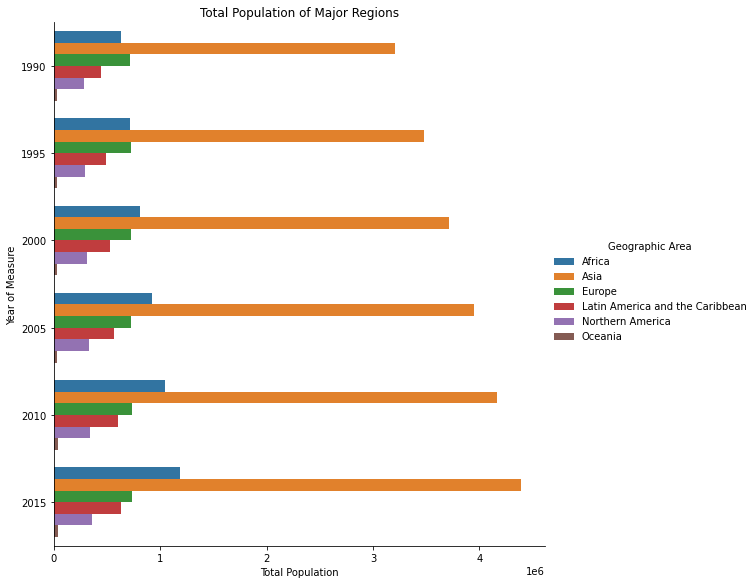

In [2596]:
#plot7: total pop of major regions overtime
plot7=sns.catplot(data=UN2RPop, kind="bar", y="Year of Measure", x="Total Population", hue = "Geographic Area",orient='h',height=8).set(title="Total Population of Major Regions")

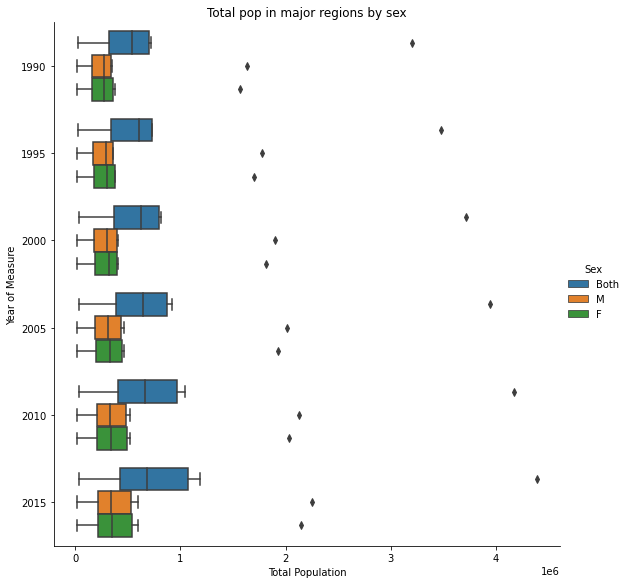

In [2597]:
#plot 8 of total pop in major regions by sex
plot8=sns.catplot(data=UN2Rpop, kind="box", y="Year of Measure", x="Total Population", hue = "Sex",height=8).set(title="Total pop in major regions by sex")

In [2598]:
#Convert Percentage of Migrants of Total Populations into numeric
UN3['Percentage of Migrants of Total Population']=pd.to_numeric(UN3['Percentage of Migrants of Total Population'], errors='coerce')


In [2599]:
#make a dataframe of same values for areas and sexes as we did for migrant population
UN3Rpop=UN3.loc[UN3['Country Code'].isin([903,935,908,904,905,909])]
UN3RPop=UN3Rpop.loc[UN3['Sex'].isin(['Both'])]

In [2600]:
#sort of % of migrants down
UN3sort1=UN3RPop.sort_values('Percentage of Migrants of Total Population', ascending=False)

display(UN3sort1)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Percentage of Migrants of Total Population,Sex,Year of Measure
1562,Oceania,NaN,909,0,0,0,0,20.596627,Both,2015
1297,Oceania,NaN,909,0,0,0,0,19.569381,Both,2010
1032,Oceania,NaN,909,0,0,0,0,18.050693,Both,2005
237,Oceania,NaN,909,0,0,0,0,17.540821,Both,1990
502,Oceania,NaN,909,0,0,0,0,17.286053,Both,1995
767,Oceania,NaN,909,0,0,0,0,17.252776,Both,2000
1556,Northern America,NaN,905,0,0,0,0,15.227203,Both,2015
1291,Northern America,NaN,905,0,0,0,0,14.884238,Both,2010
1026,Northern America,NaN,905,0,0,0,0,13.808229,Both,2005
761,Northern America,NaN,905,0,0,0,0,12.862208,Both,2000


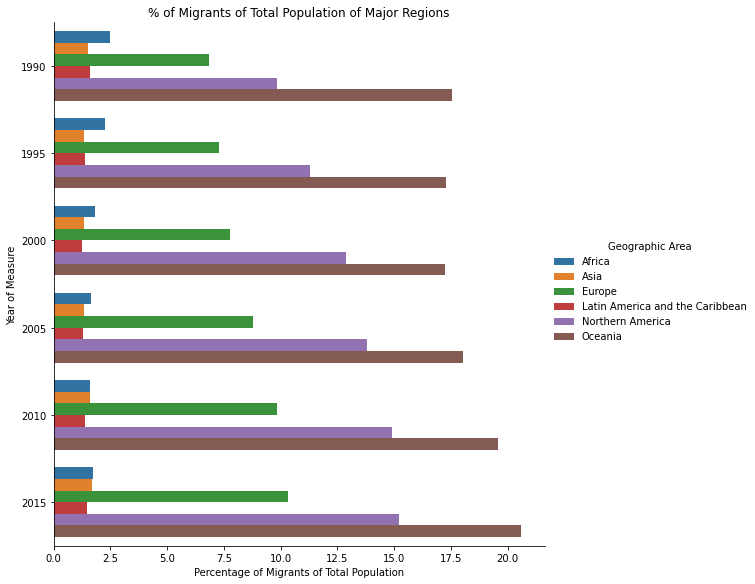

In [2601]:
#plot 9 bar graph of % of migrants of total pop
sns.catplot(data=UN3RPop, kind='bar', x="Percentage of Migrants of Total Population",y="Year of Measure", hue = "Geographic Area",orient="h",height=8).set(title="% of Migrants of Total Population of Major Regions")

plt.show()

In [2602]:
#Lastly we graph Refugees as a % of migrantstock

In [2603]:
#Convert Refugee stock as Percentage of Total Migrants into numeric
UN6t2['Refugee stock as Percentage of Total Migrants']=pd.to_numeric(UN6t2['Refugee stock as Percentage of Total Migrants'], errors='coerce')


In [2604]:
#make a dataframe of same values for areas and sexes as we did for migrant population
UN6t2RPop=UN6t2.loc[UN6t2['Country Code'].isin([903,935,908,904,905,909])]

In [2605]:
#sort of % down
UN6t2sort1=UN6t2RPop.sort_values('Refugee stock as Percentage of Total Migrants', ascending=False)

display(UN6t2sort1)

,Geographic Area,Classification Notes,Country Code,B Type of Data,C Type of Data,R Type of Data,I Type of Data,Refugee stock as Percentage of Total Migrants,Year of Measure
271,Africa,NaN,903,0,0,0,0,36.384888,1995
6,Africa,NaN,903,0,0,0,0,36.246821,1990
536,Africa,NaN,903,0,0,0,0,24.385563,2000
70,Asia,NaN,935,0,0,0,0,20.640923,1990
1331,Africa,NaN,903,0,0,0,0,19.479173,2015
600,Asia,NaN,935,0,0,0,0,18.595579,2000
801,Africa,NaN,903,0,0,0,0,18.106889,2005
1395,Asia,NaN,935,0,0,0,0,17.599949,2015
335,Asia,NaN,935,0,0,0,0,17.052599,1995
179,Latin America and the Caribbean,NaN,904,0,0,0,0,16.697956,1990


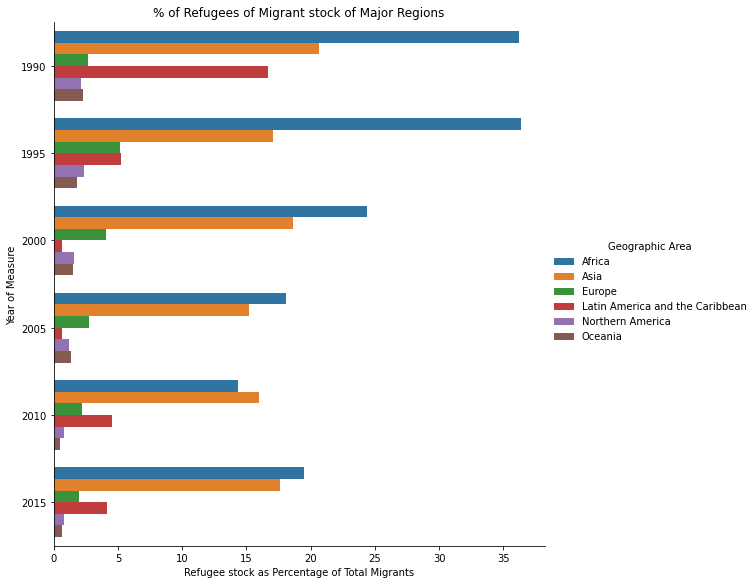

In [2606]:
#plot 10, bar graph of refugees as % of Total Migrants
sns.catplot(data=UN6t2RPop,kind='bar' ,x="Refugee stock as Percentage of Total Migrants",y="Year of Measure", hue = "Geographic Area",orient="h",height=8).set(title="% of Refugees of Migrant stock of Major Regions")

plt.show()